# GLM Reserving

In [1]:
import chainladder as cl
import pandas as pd

This example demonstrates how you can use the `TweedieGLM` estimator to incorporate
the GLM framework into a ``chainladder`` workflow.  The specific case of the Over-dispersed
poisson GLM fit to incremental paids.  It is further shown to match the basic
chainladder `Development` estimator.


In [2]:
genins = cl.load_sample('genins')

# Fit an ODP GLM
dev = cl.TweedieGLM(
    design_matrix='C(development) + C(origin)',
    link='log', power=1).fit(genins)

# Grab LDFs vs traditional approach
glm = dev.ldf_.iloc[..., 0, :].T.iloc[:, 0].rename('GLM')
traditional = cl.Development().fit(genins).ldf_.T.iloc[:, 0].rename('Traditional')

# Plot data
results = pd.concat((glm, traditional), axis=1)

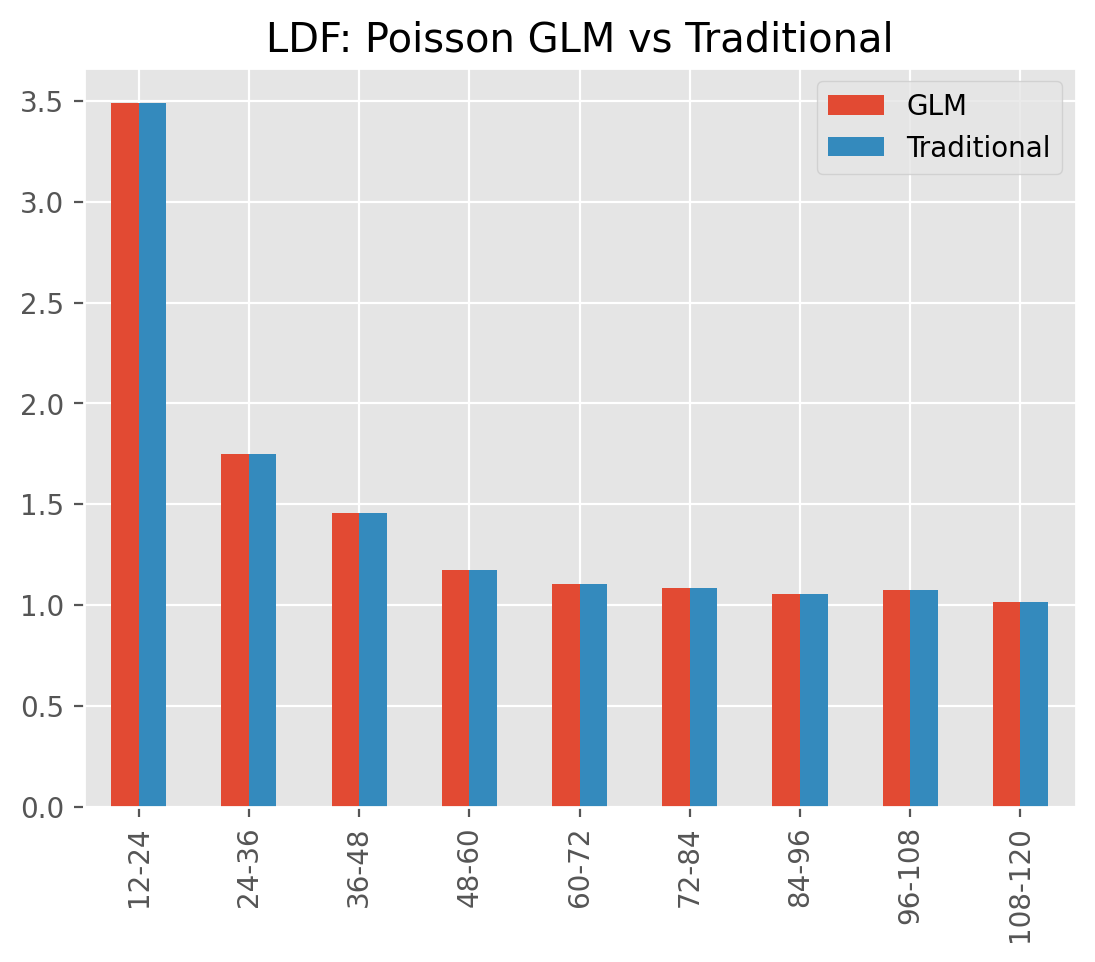

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

ax = results.plot(kind='bar', title='LDF: Poisson GLM vs Traditional');